<a href="https://colab.research.google.com/github/JLearning5/Credit-Card-Fraud-Detection-project/blob/main/notebooks/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading and Loading the Dataset

In [2]:
# Install gdown to download files from Google Drive
!pip install gdown

# Download the dataset from Google Drive using the file ID
import gdown

file_id = '1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
import pandas as pd

df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4
From (redirected): https://drive.google.com/uc?id=1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4&confirm=t&uuid=e95993fb-8a93-42a1-b153-75928c2484a9
To: /content/dataset.csv
100%|██████████| 151M/151M [00:03<00:00, 38.3MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

Loading and Inspecting the Dataset

In [4]:
df = pd.read_csv(r'/content/dataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
info = df.isnull().sum()
for variable, number in info.items():
    print(f'There are {number} empty cell in {variable} column.')

There are 0 empty cell in Time column.
There are 0 empty cell in V1 column.
There are 0 empty cell in V2 column.
There are 0 empty cell in V3 column.
There are 0 empty cell in V4 column.
There are 0 empty cell in V5 column.
There are 0 empty cell in V6 column.
There are 0 empty cell in V7 column.
There are 0 empty cell in V8 column.
There are 0 empty cell in V9 column.
There are 0 empty cell in V10 column.
There are 0 empty cell in V11 column.
There are 0 empty cell in V12 column.
There are 0 empty cell in V13 column.
There are 0 empty cell in V14 column.
There are 0 empty cell in V15 column.
There are 0 empty cell in V16 column.
There are 0 empty cell in V17 column.
There are 0 empty cell in V18 column.
There are 0 empty cell in V19 column.
There are 0 empty cell in V20 column.
There are 0 empty cell in V21 column.
There are 0 empty cell in V22 column.
There are 0 empty cell in V23 column.
There are 0 empty cell in V24 column.
There are 0 empty cell in V25 column.
There are 0 empty ce

In [8]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(f'There are {legit.shape[0]} legitimate transactions')
print(f'There are {fraud.shape[0]} fraudulent transactions')

There are 284315 legitimate transactions
There are 492 fraudulent transactions


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Preprocessing

In [12]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Handling Imbalanced Data with SMOTE

In [13]:
# Apply SMOTE to the training data
sampling = SMOTE()
X_train_resampled, y_train_resampled  = sampling.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled =  sampling.fit_resample(X_test, y_test)

Model Training

In [14]:
# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Making Predictions

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test_resampled)
y_pred_proba = model.predict_proba(X_test_resampled)[:, 1]

Evaluation

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f'Accuracy: {accuracy}')
print()
print(classification_report(y_test_resampled, y_pred))

Accuracy: 0.919004630986576

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     85295
           1       0.97      0.86      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.92      0.92      0.92    170590
weighted avg       0.92      0.92      0.92    170590



Class Distribution

Visualising the count of each class using Bar Plot

Exploratory Data Analysis

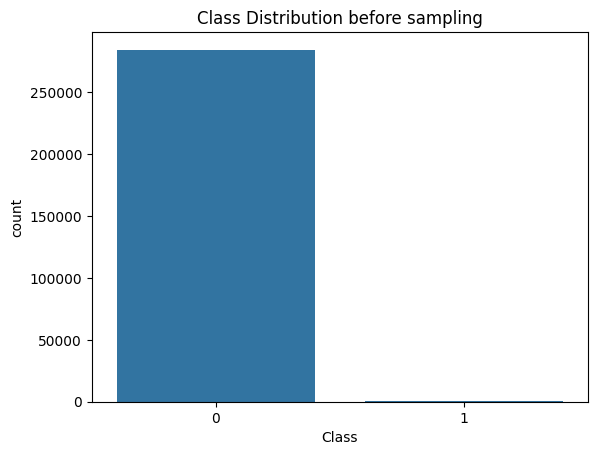

In [17]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution before sampling')
plt.show()

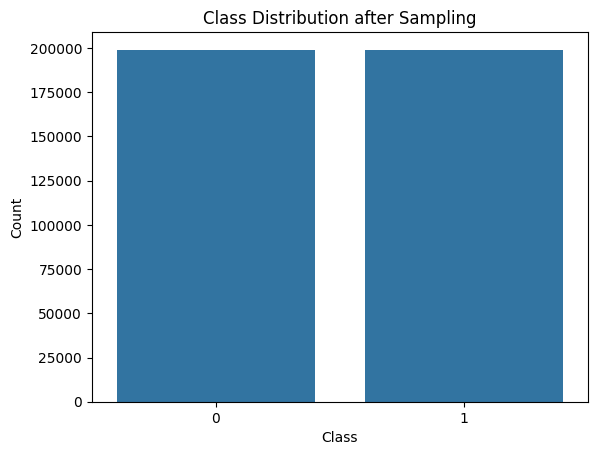

In [18]:
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution after Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 Amount Distribution

Visualising the transaction amounts using histogram and box plot

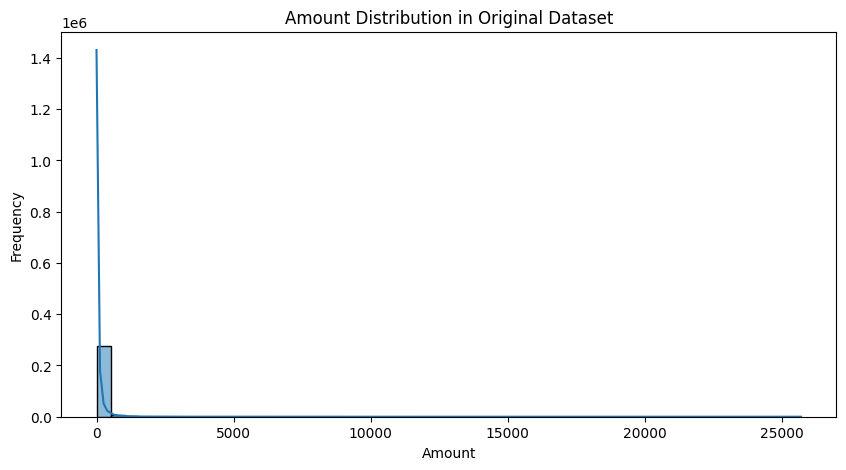

In [19]:
# Plot the histogram for the 'Amount' distribution in the original dataset
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Amount Distribution in Original Dataset')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

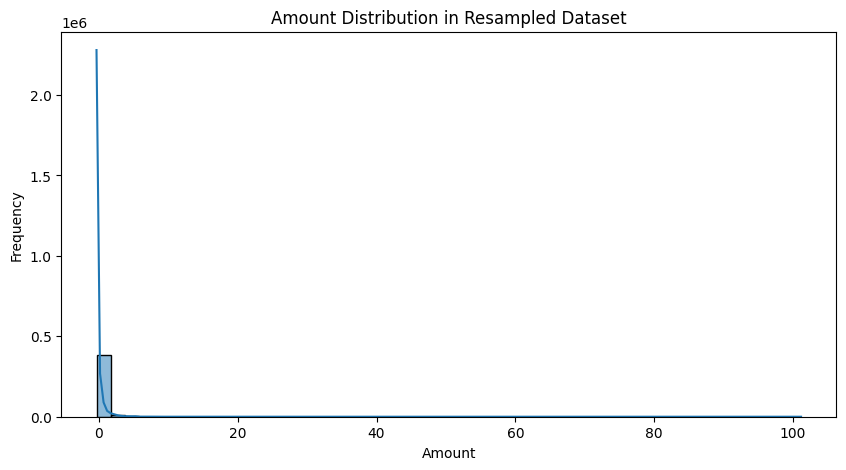

In [20]:
# Plot the histogram for the 'Amount' distribution in the resampled dataset
# Create a DataFrame from the resampled data for easier plotting
resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_df['Class'] = y_train_resampled

plt.figure(figsize=(10, 5))
sns.histplot(resampled_df['Amount'], bins=50, kde=True)
plt.title('Amount Distribution in Resampled Dataset')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

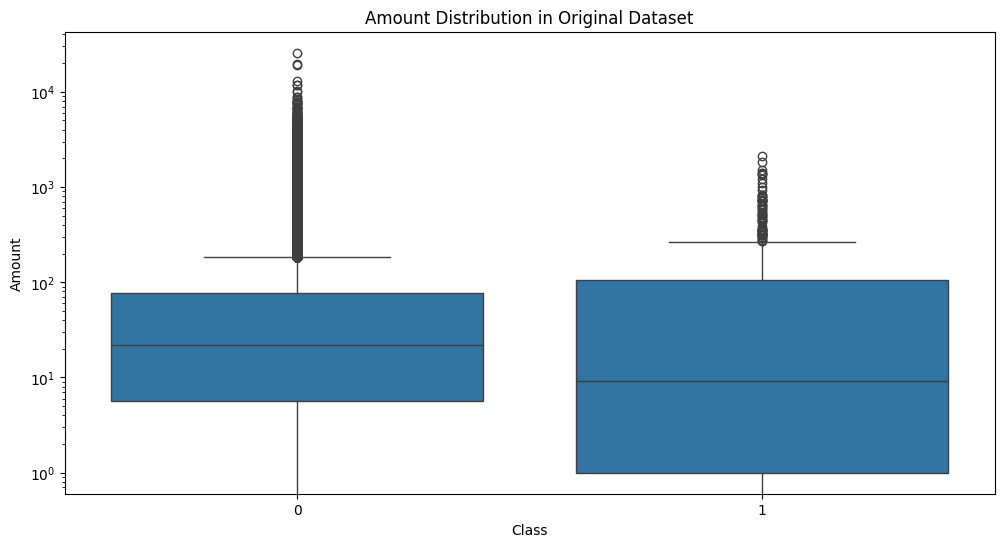

In [21]:
# Plot the box plot for the Amount feature in the original dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution in Original Dataset')
plt.yscale('log')  # Use log scale if there are large outliers
plt.show()

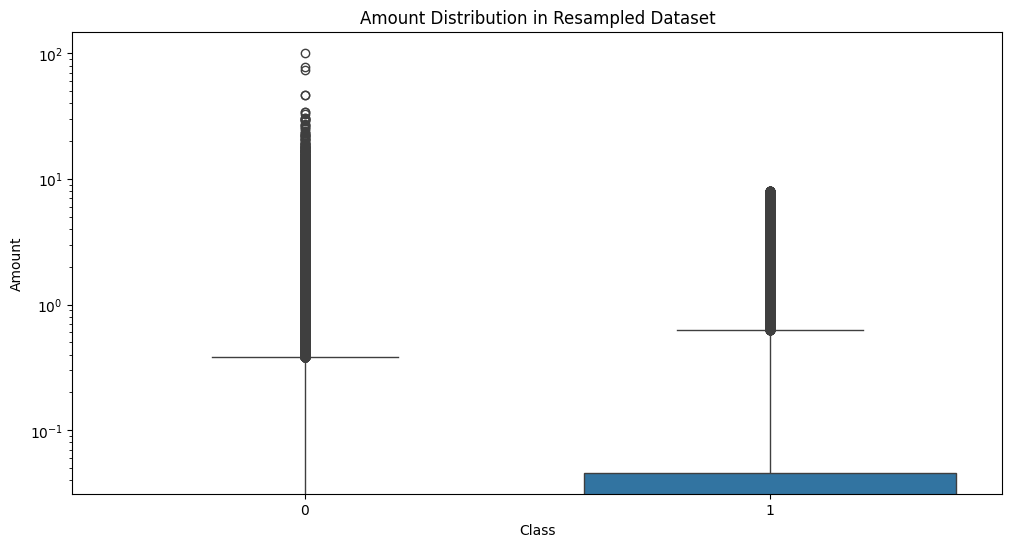

In [22]:
# Plot the box plot for the Amount feature in the resampled dataset
resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_df['Class'] = y_train_resampled

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=resampled_df)
plt.title('Amount Distribution in Resampled Dataset')
plt.yscale('log')  # Use log scale if there are large outliers
plt.show()

Time Distribution

Visualising the time of transactions using histogram and box plot

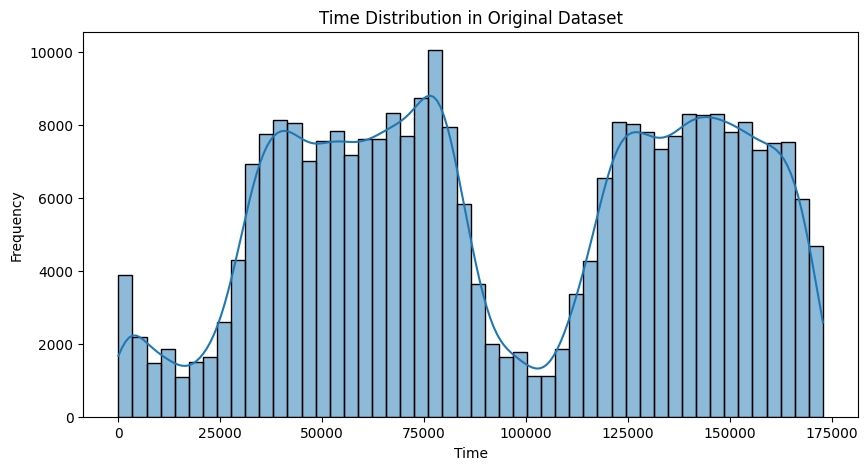

In [23]:
# Plot the histogram for the 'Time' distribution in the original dataset
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Time Distribution in Original Dataset')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

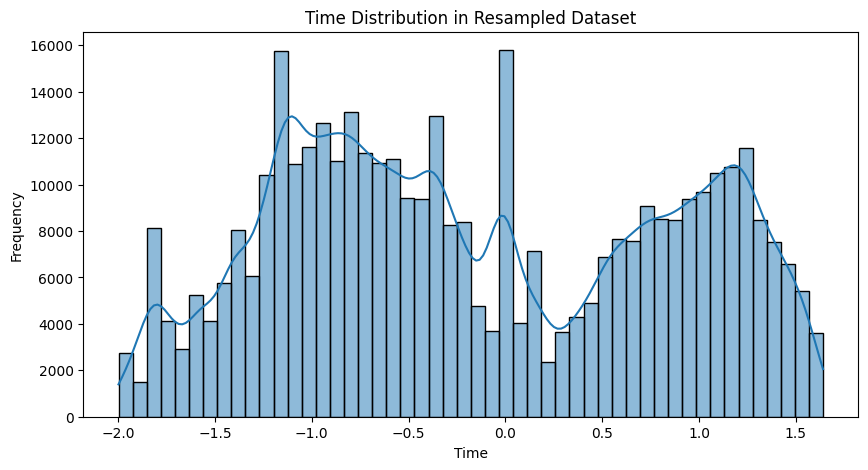

In [24]:
# Plot the histogram for the 'Time' distribution in the resampled dataset
# Create a DataFrame from the resampled data for easier plotting
resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_df['Class'] = y_train_resampled

plt.figure(figsize=(10, 5))
sns.histplot(resampled_df['Time'], bins=50, kde=True)
plt.title('Time Distribution in Resampled Dataset')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

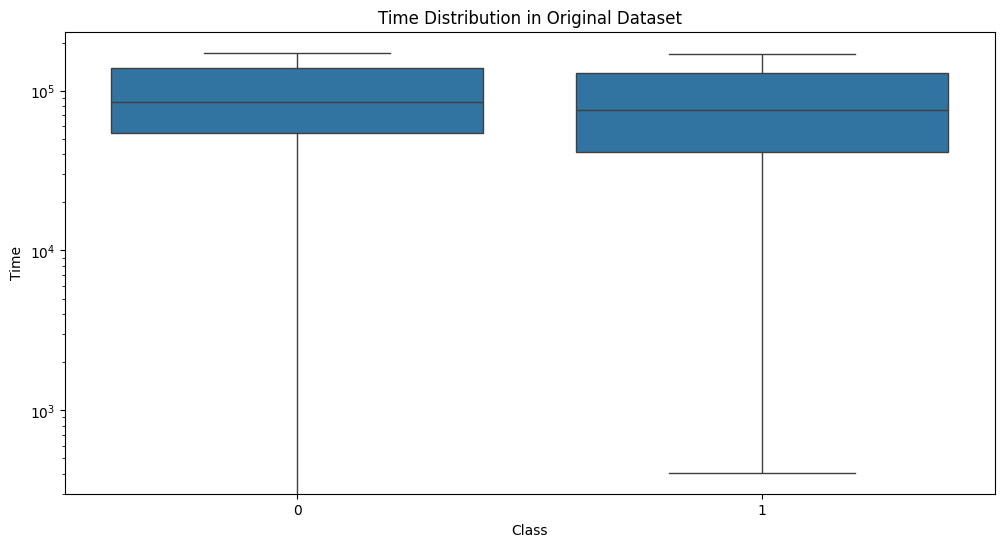

In [25]:
# Plot the box plot for the Time feature in the original dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Time Distribution in Original Dataset')
plt.yscale('log')  # Use log scale if there are large outliers
plt.show()


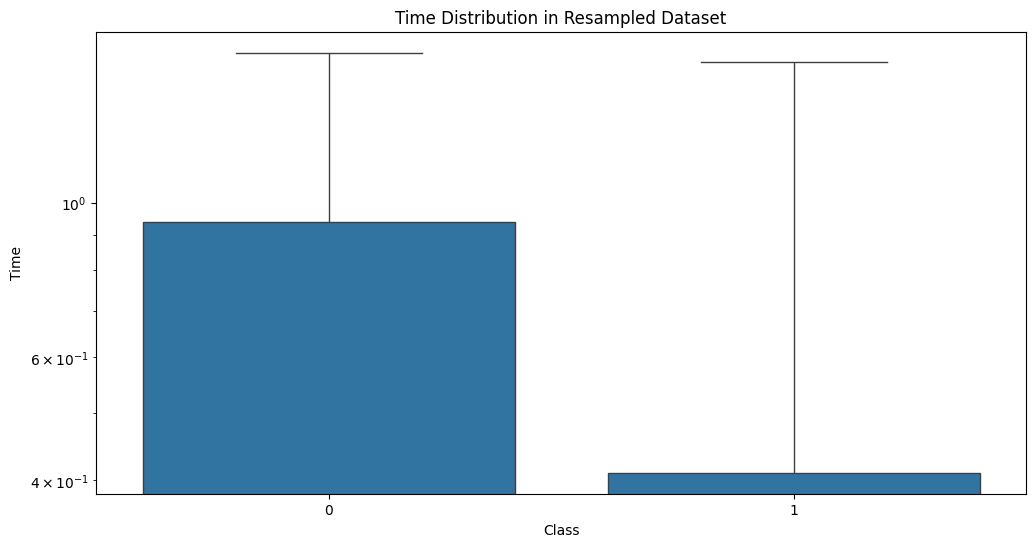

In [26]:
# Plot the box plot for the Time feature in the resampled dataset
resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_df['Class'] = y_train_resampled

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=resampled_df)
plt.title('Time Distribution in Resampled Dataset')
plt.yscale('log')  # Use log scale if there are large outliers
plt.show()

Correlation Matrix

Visualising the correlation matrix using Heatmap

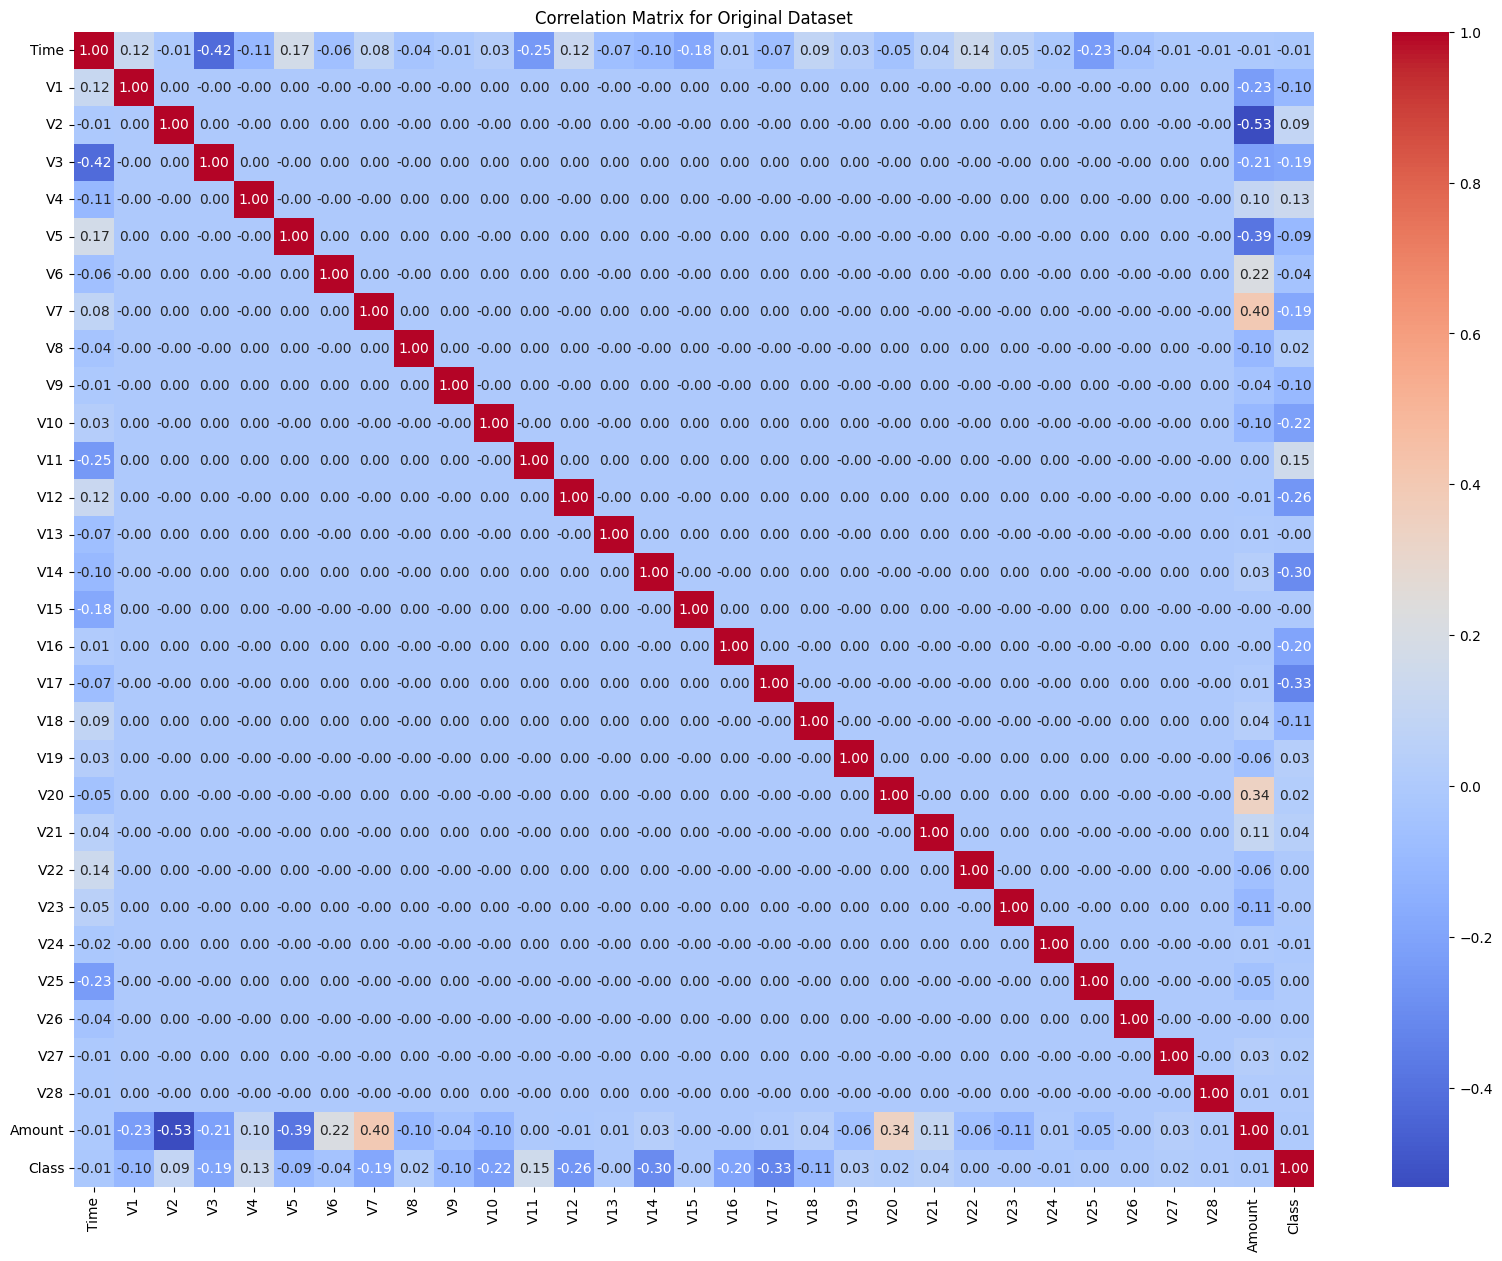

In [27]:
# Compute the correlation matrix for the original dataset
corr_matrix_original = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_original, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Original Dataset')
plt.show()

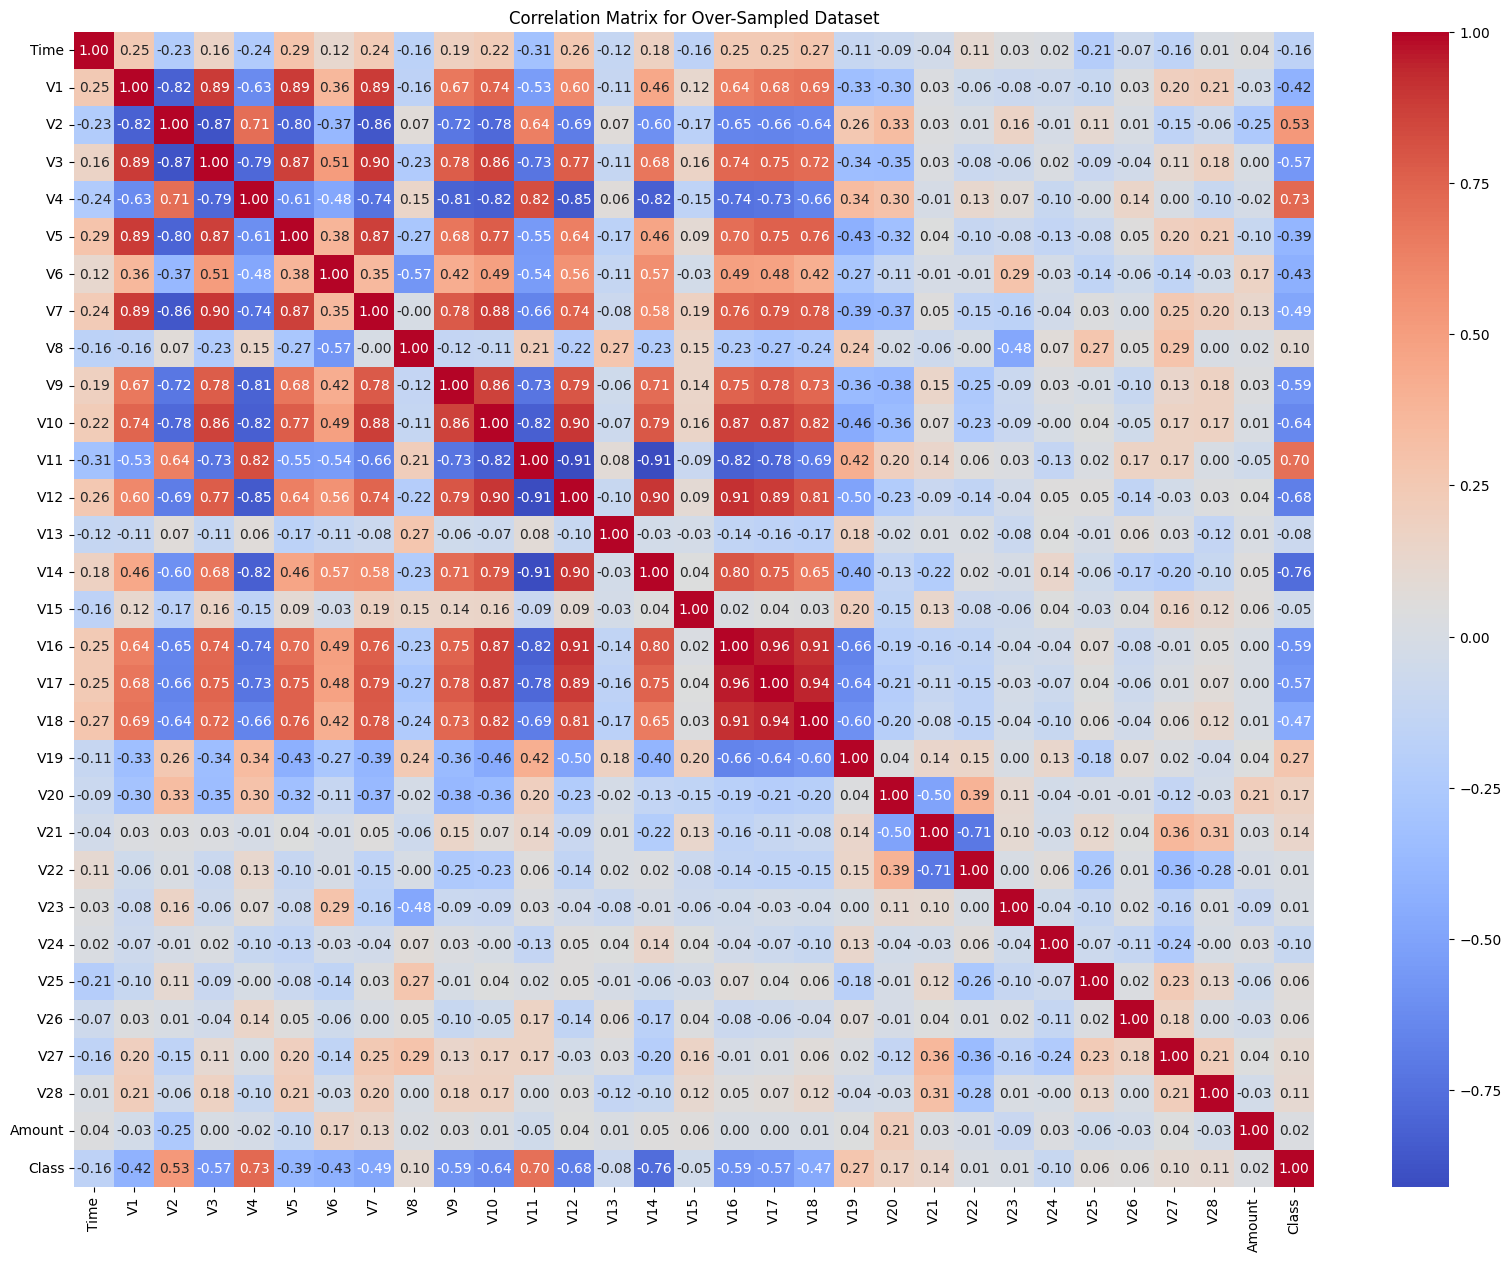

In [28]:
# Convert the resampled training data back into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)

# Add the target variable to the resampled DataFrame
X_train_resampled_df['Class'] = y_train_resampled.values

# Compute the correlation matrix
corr_matrix = X_train_resampled_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Over-Sampled Dataset')
plt.show()

Pairplot

Visualising the relationships between pairs of features using Pairplot

Before Sampling

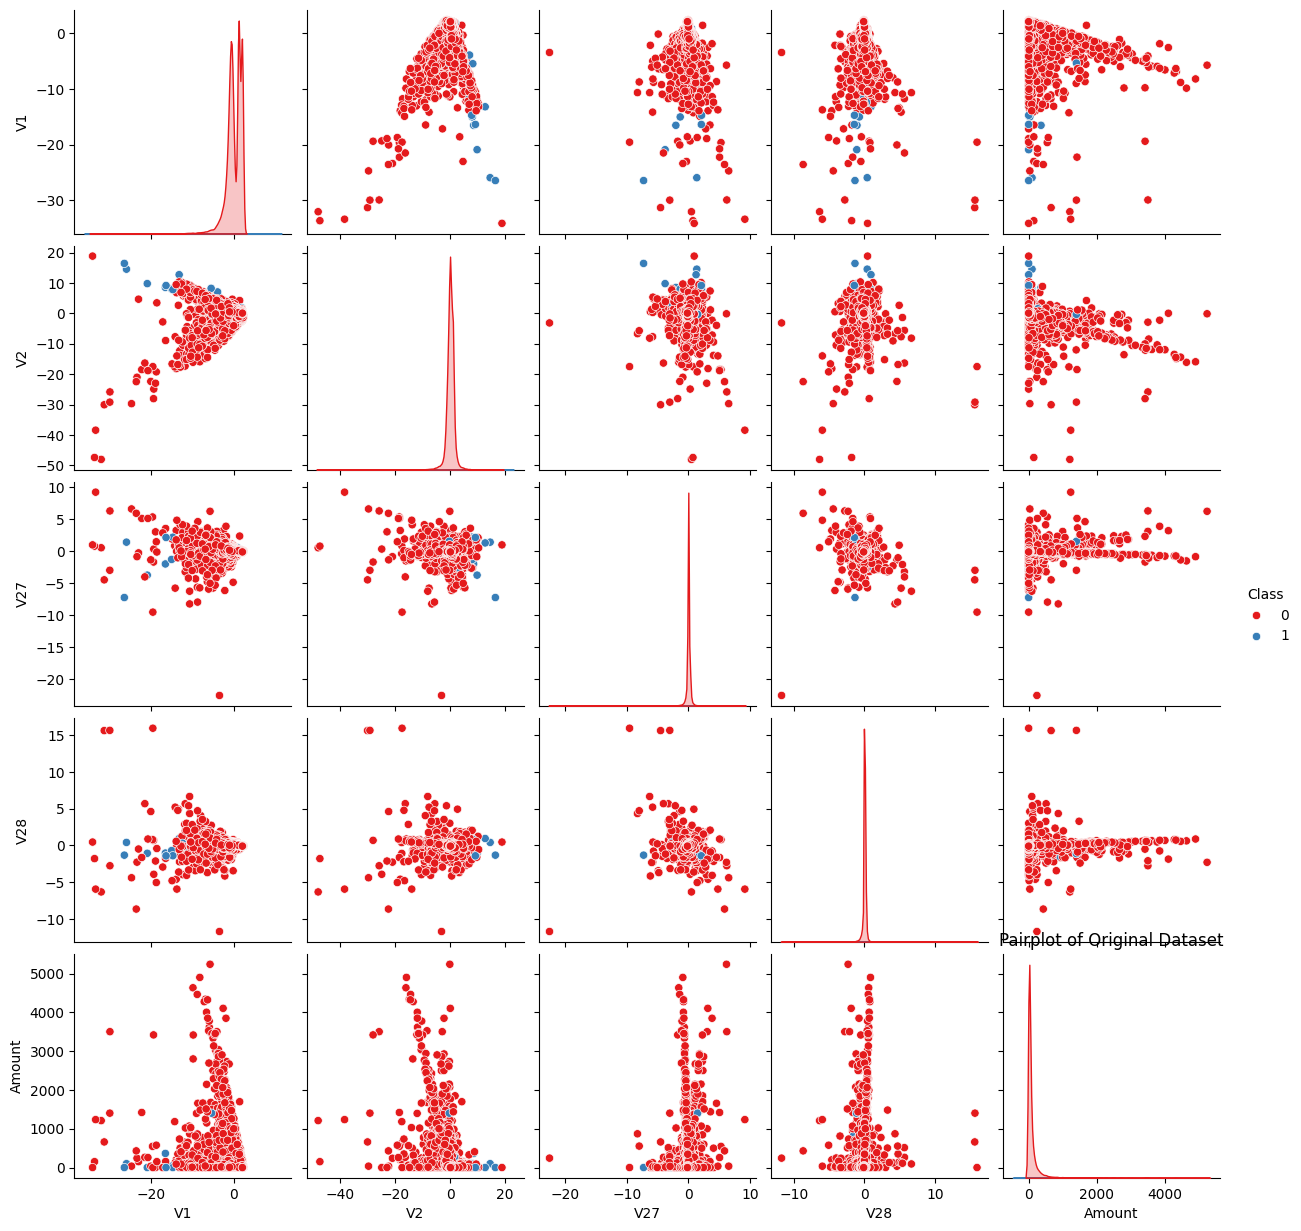

In [29]:
# Select specific columns for the pairplot
selected_columns = ['V1', 'V2', 'V27', 'V28', 'Amount', 'Class']

# Plot the pairplot for the original dataset
df_sampled = df[selected_columns].sample(frac=0.1, random_state=42)  # Sample a fraction of the original dataset for visualization
sns.pairplot(df_sampled, hue='Class', palette='Set1')
plt.title('Pairplot of Original Dataset')
plt.show()

After Sampling

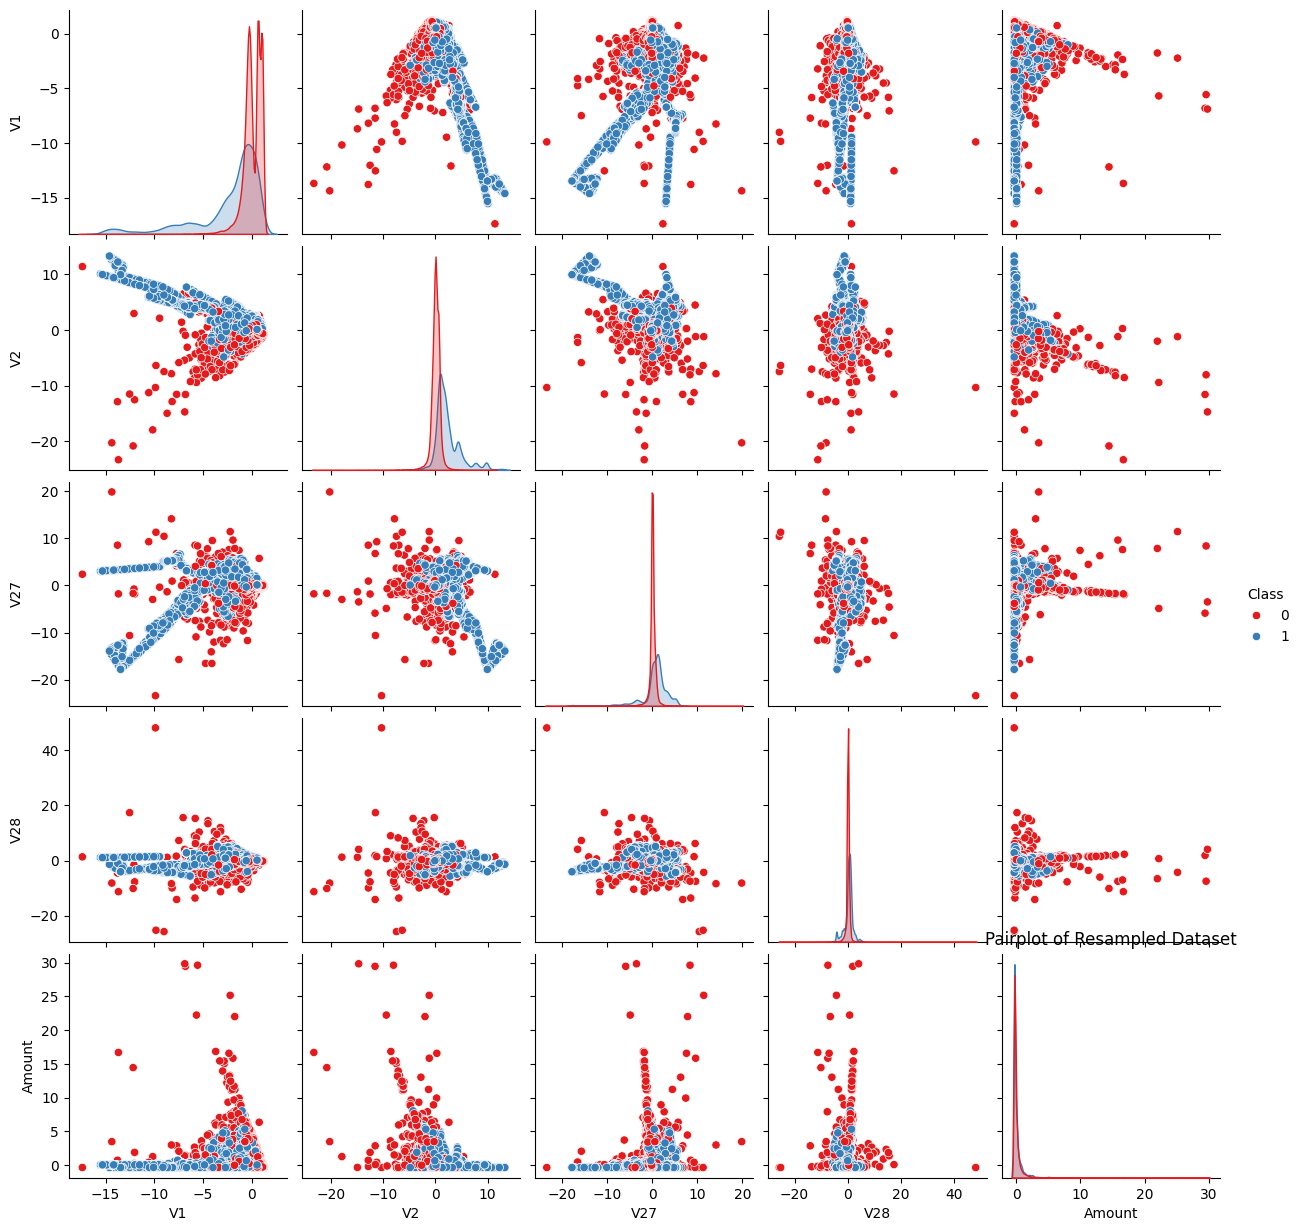

In [30]:
# Prepare the resampled dataset for pairplot
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_train_resampled_selected = X_train_resampled_df[selected_columns[:-1]]
y_train_resampled_df = pd.Series(y_train_resampled, name='Class')
df_resampled = pd.concat([X_train_resampled_selected, y_train_resampled_df], axis=1)

# Sample a fraction of the resampled dataset for visualization
df_resampled_sampled = df_resampled.sample(frac=0.1, random_state=42)

# Plot the pairplot for the resampled dataset
sns.pairplot(df_resampled_sampled, hue='Class', palette='Set1')
plt.title('Pairplot of Resampled Dataset')
plt.show()

ROC Curve

Visualising the true positive rate against the false positive rate.

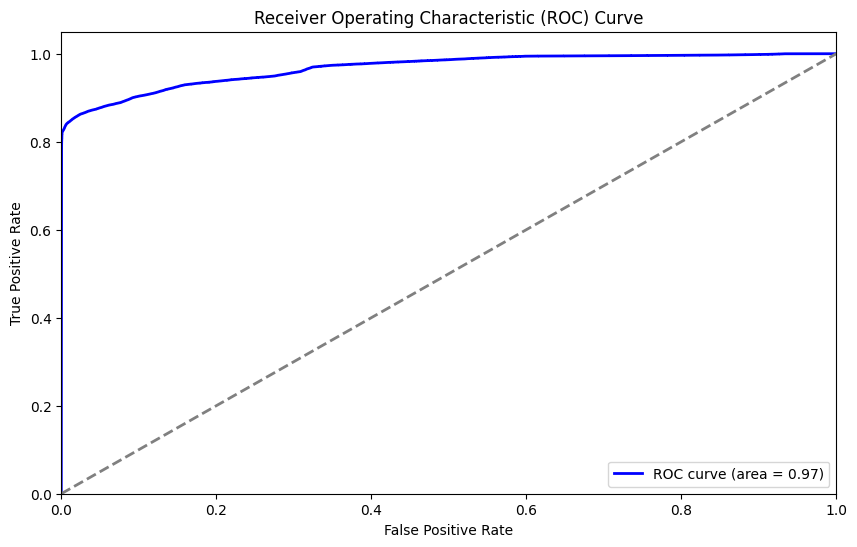

In [31]:
# Generate a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba)
roc_auc = roc_auc_score(y_test_resampled, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

Visualising precision vs. recall for different thresholds.

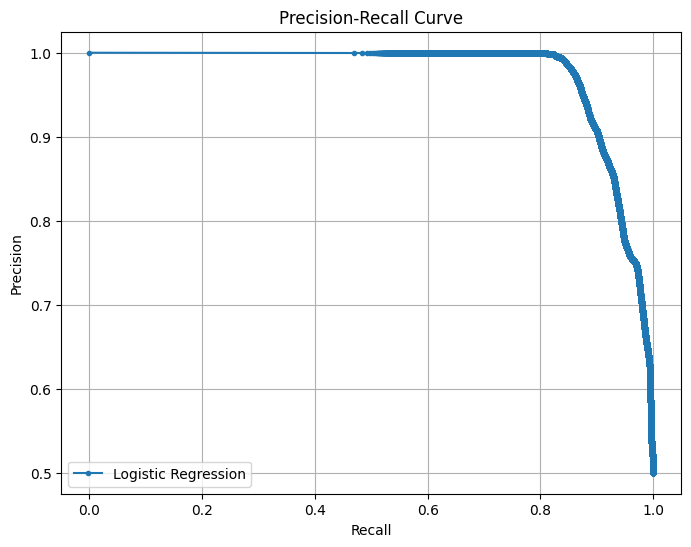

In [33]:
# Generate a precision-recall curve for the resampled dataset
precision, recall, thresholds = precision_recall_curve(y_test_resampled, y_pred_proba)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix

Visualising the performance of the classification model by showing the true positive, true negative, false positive, and false negative counts.

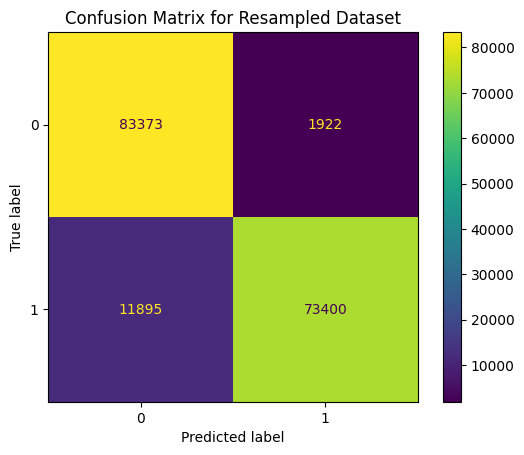

In [34]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Resampled Dataset")
plt.show()

In [35]:
# Suppress specific sklearn warnings and replace them with custom messages
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

try:
    # Predict on a new transaction (example features)
    new_transaction = np.array([0.2704568257798388,-1.4100452434491368,-0.3117292198664098,1.6287830759584023,0.8013838934316672,0.417070455825756,0.9633049656243808,-0.7379566907985511,0.19803020642922586,1.115174093371789,-1.5786111091213717,-0.008239340620064928,-1.2804246149458467,-0.42079117840684066,-1.0744285105425169,-0.33670512866451907,-2.0979429628831627,0.256056188661382,0.2855130817214819,-0.5003236651044085,0.8900045567773739,-1.6798268402689598,0.21175777735268342,-1.3214901097624567,-0.5849080328021592,0.175938029316414,-1.0495282092839524,-0.25099716722982535,0.9852397562144405,149.04310813047687])

    # Reshape and scale the new transaction
    new_transaction = new_transaction.reshape(1, -1)
    new_transaction_scaled = scaler.transform(new_transaction)

    # Predict the class of the new transaction
    new_prediction = model.predict(new_transaction_scaled)
    print(f"Detection for the transaction: {'Fraudulent' if new_prediction[0] == 1 else 'Legitimate'}")

except Warning as w:
    if "does not have valid feature names" in str(w):
        print("")
    else:
        print(f"")

except ValueError as v:
    if "does not have valid feature names" in str(v):
        print("Custom Message: Invalid input! The number of features should be 30")
    else:
        print(f"Invalid input! The number of features should be 30\n{str(v)}")

except NameError as n:
    if "does not have valid feature names" in str(n):
        print("Invalid input! The input data does not have valid features.")
    else:
        print(f"Invalid input! The input data does not have valid features.\n{str(n)}")

Detection for the transaction: Fraudulent
